<h1>Análise dos dados mundiais do covid-19</h1>

<h3>Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.</h3>

Dados retirados do site https://covid19.who.int/
<br>
Ultima atualização dos dados:12/07/2020

Aluno: Christian Dantas Germano 3º ADS B

Réferencias:
https://github.com/Chrisdangermano/Analise-de-vendas-de-jogos


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [27]:
filename = r'E:\EP04\covid19_globaldata.csv'
df = pd.read_csv(filename, delimiter=',', 
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

In [28]:
df.shape

(27772, 8)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27772 entries, 0 to 27771
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date_reported       27772 non-null  object
 1    Country_code       27651 non-null  object
 2    Country            27772 non-null  object
 3    WHO_region         27772 non-null  object
 4    New_cases          27772 non-null  int64 
 5    Cumulative_cases   27772 non-null  int64 
 6    New_deaths         27772 non-null  int64 
 7    Cumulative_deaths  27772 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.3+ MB


In [30]:
for par in enumerate(df.columns): print (par)

(0, 'Date_reported')
(1, ' Country_code')
(2, ' Country')
(3, ' WHO_region')
(4, ' New_cases')
(5, ' Cumulative_cases')
(6, ' New_deaths')
(7, ' Cumulative_deaths')


In [31]:
#Tirando espaços das colunas
df.columns=['Date_reported','Country_code','Country','WHO_region','New_cases','Cumulative_cases','New_deaths','Cumulative_deaths']

In [32]:
for par in enumerate(df.columns): print (par)

(0, 'Date_reported')
(1, 'Country_code')
(2, 'Country')
(3, 'WHO_region')
(4, 'New_cases')
(5, 'Cumulative_cases')
(6, 'New_deaths')
(7, 'Cumulative_deaths')


In [33]:
#Colocando o coluna de data em evidência
df2 = df.set_index('Date_reported')
df2.head(10)

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-02-24,AF,Afghanistan,EMRO,1,1,0,0
2020-02-25,AF,Afghanistan,EMRO,0,1,0,0
2020-02-26,AF,Afghanistan,EMRO,0,1,0,0
2020-02-27,AF,Afghanistan,EMRO,0,1,0,0
2020-02-28,AF,Afghanistan,EMRO,0,1,0,0
2020-02-29,AF,Afghanistan,EMRO,0,1,0,0
2020-03-01,AF,Afghanistan,EMRO,0,1,0,0
2020-03-02,AF,Afghanistan,EMRO,0,1,0,0
2020-03-03,AF,Afghanistan,EMRO,0,1,0,0


In [47]:
#Determinado a data para uso dos dados
df2 = df2.loc['2020-07-11']
df2.sample(200)

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-07-11,MD,Republic of Moldova,EURO,258,18924,8,635
2020-07-11,MZ,Mozambique,AFRO,19,1111,0,9
2020-07-11,GI,Gibraltar,EURO,1,180,0,0
2020-07-11,BI,Burundi,AFRO,31,250,0,1
2020-07-11,DM,Dominica,AMRO,0,18,0,0
...,...,...,...,...,...,...,...
2020-07-11,LC,Saint Lucia,AMRO,0,22,0,0
2020-07-11,JM,Jamaica,AMRO,2,753,0,10
2020-07-11,IM,Isle of Man,EURO,0,336,0,24


<h2><center>Países com mais mortes</center></h2>

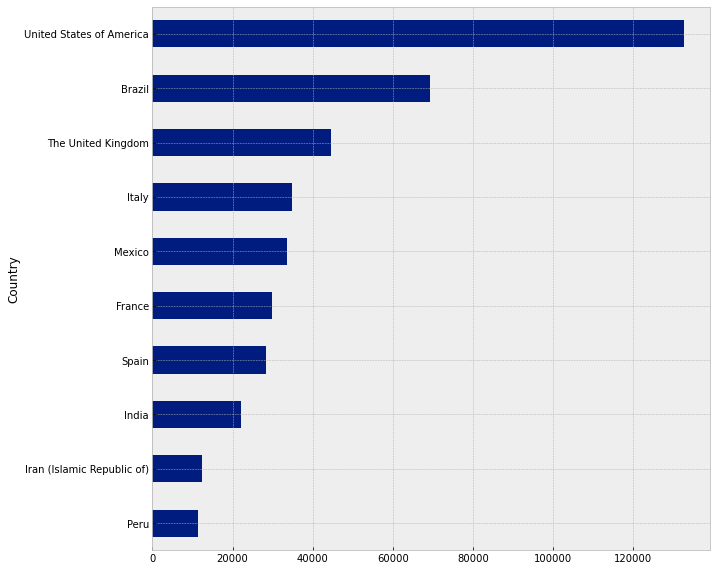

In [43]:
plt.style.use('seaborn-dark-palette')
df2.groupby('Country')['Cumulative_deaths'].max().sort_values().tail(10).plot(kind='barh', figsize=(10, 10))

<h2><center>Países com mais casos</center></h2>

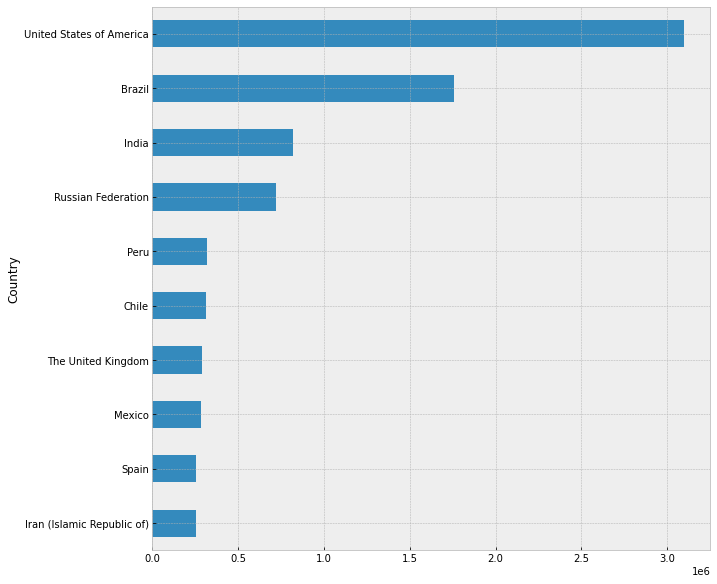

In [36]:
plt.style.use('bmh')
df2.groupby('Country')['Cumulative_cases'].max().sort_values().tail(10).plot(kind='barh', figsize=(10, 10))

<h2><center>Brasil</center></h2>

In [37]:
#Mudando tabela para apenas todos os dados do brasil
dft = df.set_index('Country')
dft = dft.loc['Brazil']
dft.head(10)

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
Brazil,2020-02-26,BR,AMRO,1,1,0,0
Brazil,2020-02-27,BR,AMRO,0,1,0,0
Brazil,2020-02-28,BR,AMRO,0,1,0,0
Brazil,2020-02-29,BR,AMRO,0,1,0,0
Brazil,2020-03-01,BR,AMRO,1,2,0,0
Brazil,2020-03-02,BR,AMRO,0,2,0,0
Brazil,2020-03-03,BR,AMRO,0,2,0,0
Brazil,2020-03-04,BR,AMRO,1,3,0,0
Brazil,2020-03-05,BR,AMRO,4,7,0,0


<h2><center>Casos nos últimos 15 dias</center></h2>

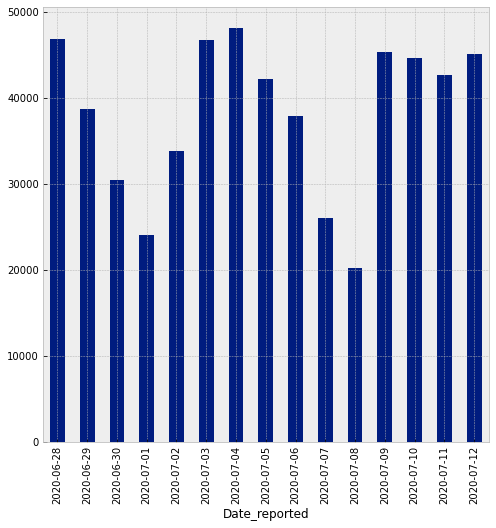

In [38]:
plt.style.use('seaborn-dark-palette')
dft.groupby('Date_reported')['New_cases'].max().tail(15).plot(kind='bar', figsize=(8, 8))

<h2><center>Mortes nos últimos 15 dias</center></h2>

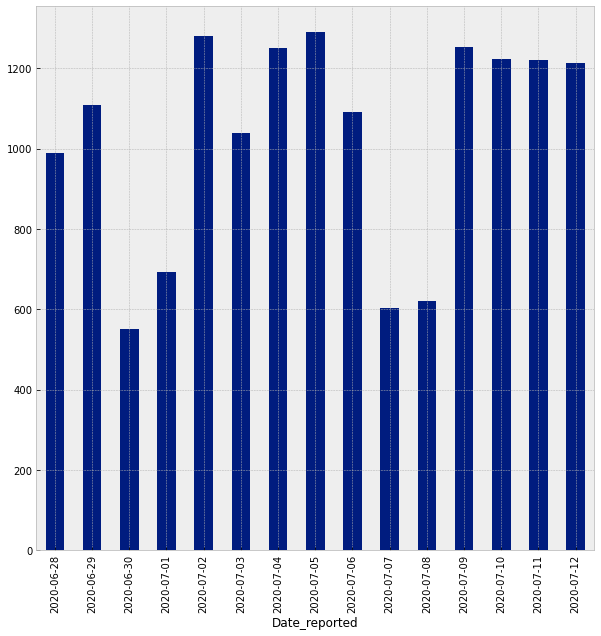

In [39]:
plt.style.use('seaborn-dark-palette')
dft.groupby('Date_reported')['New_deaths'].max().tail(15).plot(kind='bar', figsize=(10, 10))

<h2><center>Estados Unidos</center></h2>

In [40]:
#Mudando tabela para apenas todos os dados do Estados Unidos
dft = df.set_index('Country')
dft = dft.loc['United States of America']
dft.head(10)

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2020-01-20,US,AMRO,1,1,0,0
United States of America,2020-01-21,US,AMRO,0,1,0,0
United States of America,2020-01-22,US,AMRO,0,1,0,0
United States of America,2020-01-23,US,AMRO,0,1,0,0
United States of America,2020-01-24,US,AMRO,1,2,0,0
United States of America,2020-01-25,US,AMRO,0,2,0,0
United States of America,2020-01-26,US,AMRO,3,5,0,0
United States of America,2020-01-27,US,AMRO,0,5,0,0
United States of America,2020-01-28,US,AMRO,0,5,0,0


<h2><center>Casos nos últimos 15 dias</center></h2>

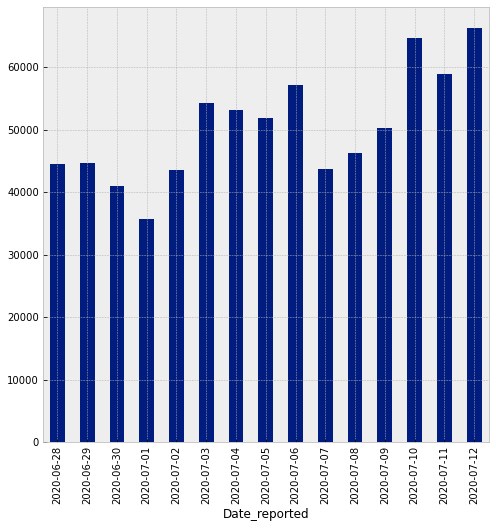

In [41]:
plt.style.use('seaborn-dark-palette')
dft.groupby('Date_reported')['New_cases'].max().tail(15).plot(kind='bar', figsize=(8, 8))

<h2><center>Mortes nos últimos 15 dias</center></h2>

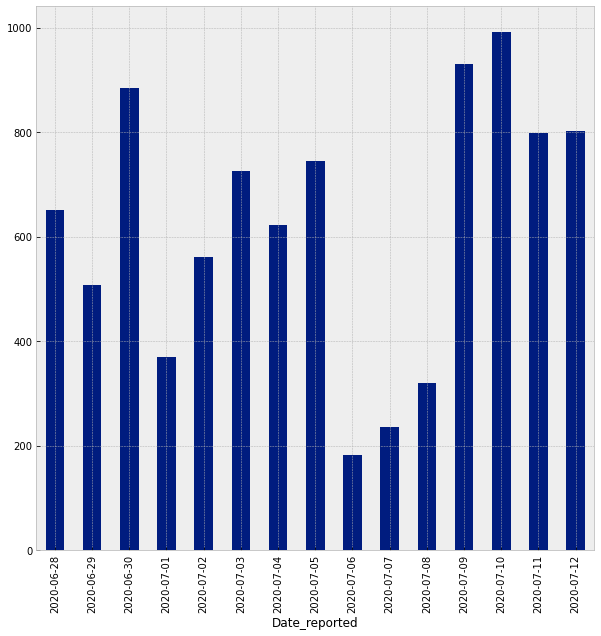

In [42]:
plt.style.use('seaborn-dark-palette')
dft.groupby('Date_reported')['New_deaths'].max().tail(15).plot(kind='bar', figsize=(10, 10))